In [7]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
conn = psycopg2.connect(dbname = "postgres",
                  user = "postgres",
                  password = "password",
                  host = "localhost",
                  port = "5432")

In [3]:
cursor = conn.cursor()

In [18]:

cursor.execute("SELECT EXTRACT(MONTH FROM rental_date) as month, COUNT(*) as rental_count FROM rental GROUP BY EXTRACT(MONTH FROM rental_date) ORDER BY month")
rows = cursor.fetchall()

for row in rows:
    print(row)
    data = pd.DataFrame(rows)
data.columns = ["MONTH","Rental"]
print(data)

(Decimal('2'), 182)
(Decimal('5'), 1156)
(Decimal('6'), 2311)
(Decimal('7'), 6739)
(Decimal('8'), 5656)
  MONTH  Rental
0     2     182
1     5    1156
2     6    2311
3     7    6739
4     8    5656


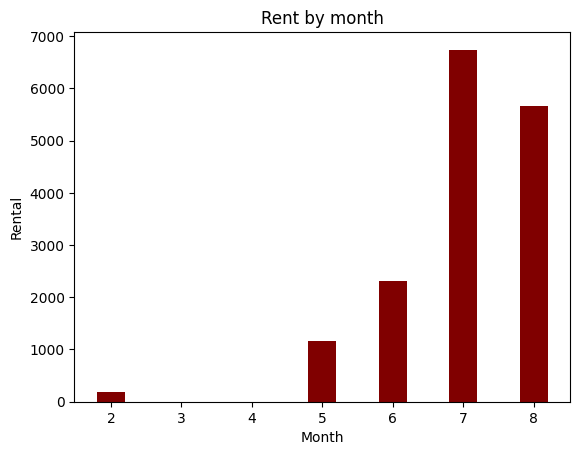

In [20]:
plt.bar(data["MONTH"], data["Rental"], color ='maroon', 
        width = 0.4)
 
plt.xlabel("Month")
plt.ylabel("Rental")
plt.title("Rent by month")
plt.show()